# Ford GoBike 2017
## by Ghaida Altamimi

## Investigation Overview

> Here we will try to get insights related to the service user's charstaristics such as gender and type.

## Dataset Overview

> The data set contains information about bicycles rides provided by Bay Area Motivate from the Bay Wheels bicycle sharing service. The dataset contains the following features; The trip duration, time and date. The start and ende station ID, name, logitude, and latitude. The user type, gender, and birthyear.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Load the data
ford = pd.read_csv('C:/Users/ghaid/Desktop/Project Template/2017-fordgobike-tripdata.csv')

In [3]:
#Data Cleaning

df1=ford.copy()

# Drop Nan values
df1.dropna(subset = ["member_birth_year","member_gender"], inplace=True)

#Change the birth year data type and create the age column
df1["member_birth_year"]=df1["member_birth_year"].astype(int)
df1['age'] = 2017-df1['member_birth_year']

#Filter the age column
df1=df1[df1['age'] <= 60]

## The Distribution of The User Type and Gender

> The plot investigate the distributon of the sevice users in term of gender and type.

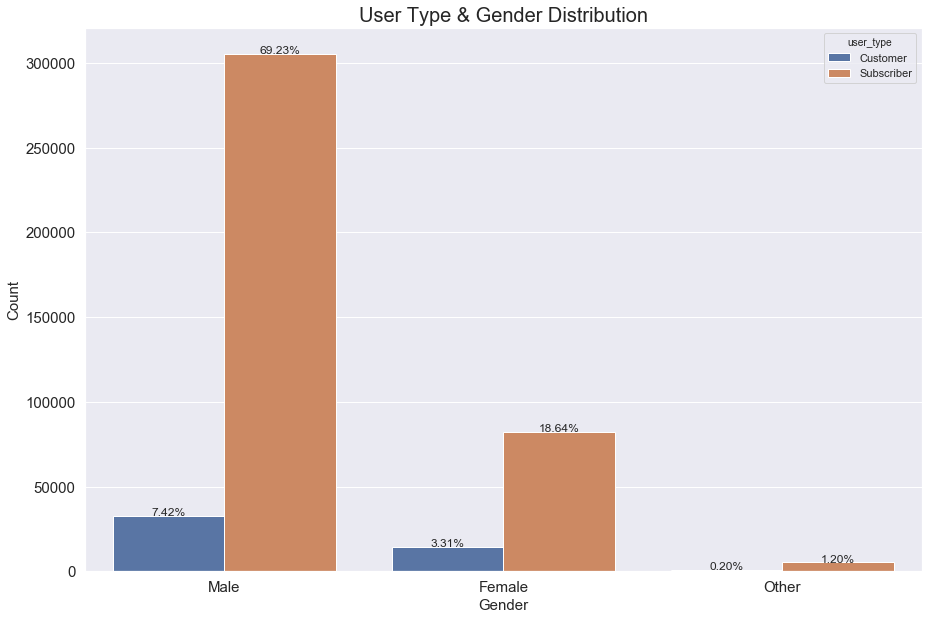

In [5]:
# plot
ax=sb.countplot(data = df1, x = 'member_gender', hue = 'user_type')


# Labels
ax.axes.set_title("User Type & Gender Distribution",fontsize=20)
ax.set_xlabel("Gender",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
ax.tick_params(labelsize=15)
sb.set(rc={'figure.figsize': (15,10)})
#Percentage
total=float(len(df1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/total),
            ha="center") 

## Duration vs Gender vs Age

> The plot investigates the  duration for different users in term of gender and age

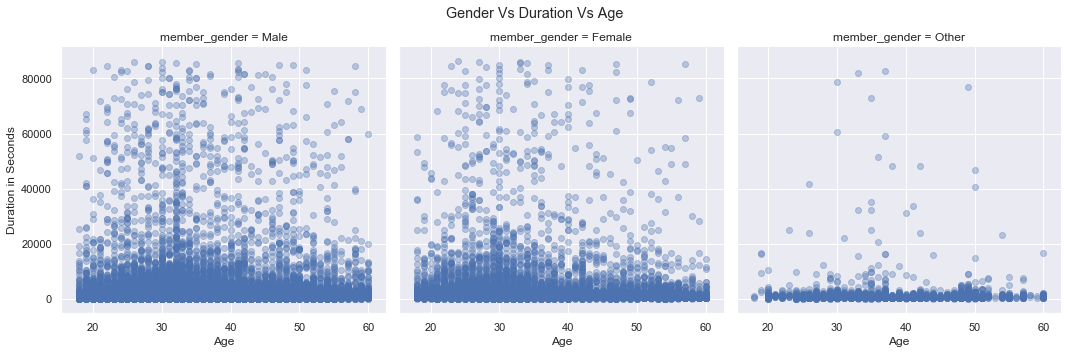

In [6]:
g= sb.FacetGrid(data = df1, col = 'member_gender', height=5,margin_titles = True)
g.map(plt.scatter, 'age', 'duration_sec',alpha=1/3)

#Title
plt.subplots_adjust(top=0.87)
g.fig.suptitle('Gender Vs Duration Vs Age')

# Axes
g.set_xlabels('Age')
g.set_ylabels('Duration in Seconds')

## The Average Duration Spent by Differnt User Types and Genders

> The plot investigates the average duration for different users in term of gender and type

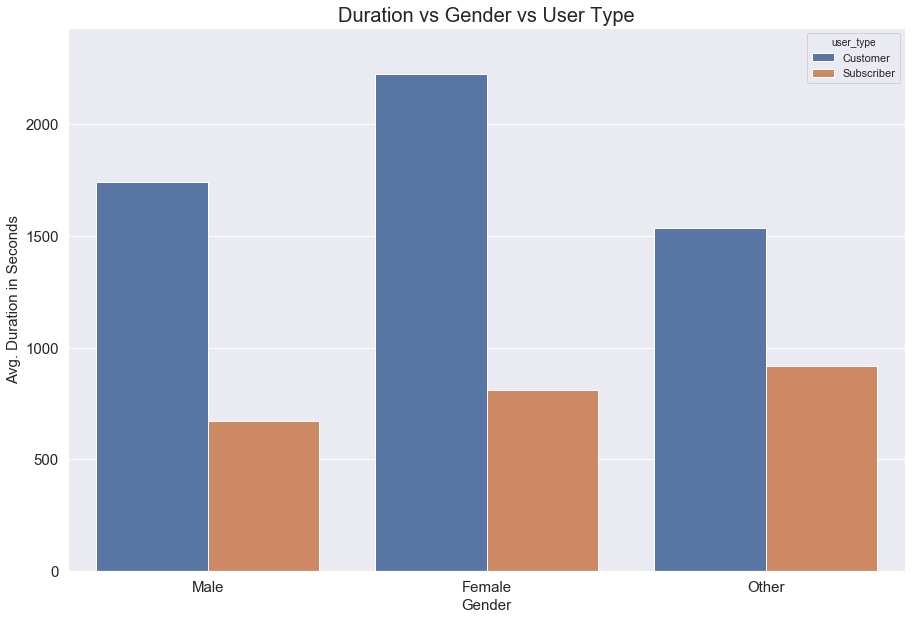

In [7]:
ax=sb.barplot(data = df1, x = 'member_gender', y='duration_sec', hue = 'user_type', errwidth=0)

ax.axes.set_title("Duration vs Gender vs User Type",fontsize=20)
ax.set_xlabel("Gender",fontsize=15)
ax.set_ylabel("Avg. Duration in Seconds",fontsize=15)
ax.tick_params(labelsize=15)

## Key Insights:

- Male subscribers represnt more than half of the service users.
- Males Have higher duration rates, but on average the females and the others has a higher duration.
- Customers have higher duration average compared to subscribers.

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle